In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import os

In [2]:
def plot_voronoi_style_error(sample_sizes, errors, std_errors=None, filename='voronoi_style_error.pdf', title='Voronoi-Style Error vs. Sample Size'):
    # Ensure the export directory exists
    export_dir = 'export'
    os.makedirs(export_dir, exist_ok=True)

    # Convert to numpy arrays
    sample_sizes = np.array(sample_sizes)
    errors = np.array(errors)
    if std_errors is not None:
        std_errors = np.array(std_errors)

    # Fit a power law curve: y = a * x^b
    from scipy.optimize import curve_fit

    def power_law(x, a, b):
        return a * x**b

    try:
        # Fit the curve
        params, _ = curve_fit(power_law, sample_sizes, errors)
        a, b = params

        # Generate points for the fitted curve
        x_fit = np.logspace(np.log10(min(sample_sizes)), np.log10(max(sample_sizes)), 100)
        y_fit = power_law(x_fit, a, b)

        # Create the plot
        plt.figure(figsize=(10, 6))

        # Plot the fitted curve
        plt.plot(x_fit, y_fit, '--', color='orange', label=f'{a:.2f}n^{b:.5f}')

        # Plot the data points with error bars if provided
        if std_errors is not None:
            plt.errorbar(sample_sizes, errors, yerr=std_errors, fmt='-o', color='blue', label='D₁(Ĝₙ, G*)')
        else:
            plt.plot(sample_sizes, errors, '-o', color='blue', label='D₁(Ĝₙ, G*)')
        
        # Use log scales for both axes to match the example
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('log(sample size)')
        plt.ylabel('log(loss)')
        plt.grid(True, which='both', linestyle='--', alpha=0.2)
        # plt.title(title)
        plt.legend()
        plt.tight_layout()
        plt.savefig(os.path.join(export_dir, filename))
        plt.show()
        plt.close()
    except Exception as e:
        # If curve fitting fails, create a simple plot without the fitted curve
        print(f"Warning: Could not fit curve. Error: {e}")
        plt.figure(figsize=(8, 6))

        if std_errors is not None:
            plt.errorbar(sample_sizes, errors, yerr=std_errors, fmt='-o', color='blue', label='D₁(Ĝₙ, G*)')
        else:
            plt.plot(sample_sizes, errors, '-o', color='blue', label='D₁(Ĝₙ, G*)')

        plt.xscale('log')
        # plt.yscale('log')  # User prefers normal scale for Voronoi loss
        plt.xlabel('Sample Size (log scale)')
        plt.ylabel('Voronoi Loss')
        plt.grid(True, which='both', linestyle='--', alpha=0.3)
        plt.title(title)
        plt.legend()
        plt.tight_layout()
        plt.savefig(os.path.join(export_dir, filename))
        plt.show()
        plt.close()

In [11]:
result[1][49]

np.float64(0.032151789934204957)

In [12]:
result[:, :49]

array([[1.00000000e+02, 2.00000000e+02, 3.00000000e+02, 4.00000000e+02,
        5.00000000e+02, 6.00000000e+02, 7.00000000e+02, 8.00000000e+02,
        9.00000000e+02, 1.00000000e+03, 1.50000000e+03, 1.79300000e+03,
        2.08600000e+03, 2.37900000e+03, 2.67200000e+03, 2.96500000e+03,
        3.25800000e+03, 3.55100000e+03, 3.84400000e+03, 4.13700000e+03,
        4.43100000e+03, 4.72400000e+03, 5.01700000e+03, 5.31000000e+03,
        5.60300000e+03, 5.89600000e+03, 6.18900000e+03, 6.48200000e+03,
        6.77500000e+03, 7.06800000e+03, 7.36200000e+03, 7.65500000e+03,
        7.94800000e+03, 8.24100000e+03, 8.53400000e+03, 8.82700000e+03,
        9.12000000e+03, 9.41300000e+03, 9.70600000e+03, 1.00000000e+04,
        1.50000000e+04, 1.64400000e+04, 1.78810000e+04, 1.93220000e+04,
        2.07620000e+04, 2.22030000e+04, 2.36440000e+04, 2.50840000e+04,
        2.65250000e+04],
       [1.58525795e-01, 7.98271157e-02, 7.53035317e-02, 7.44953716e-02,
        5.95904424e-02, 4.76159283e-02,

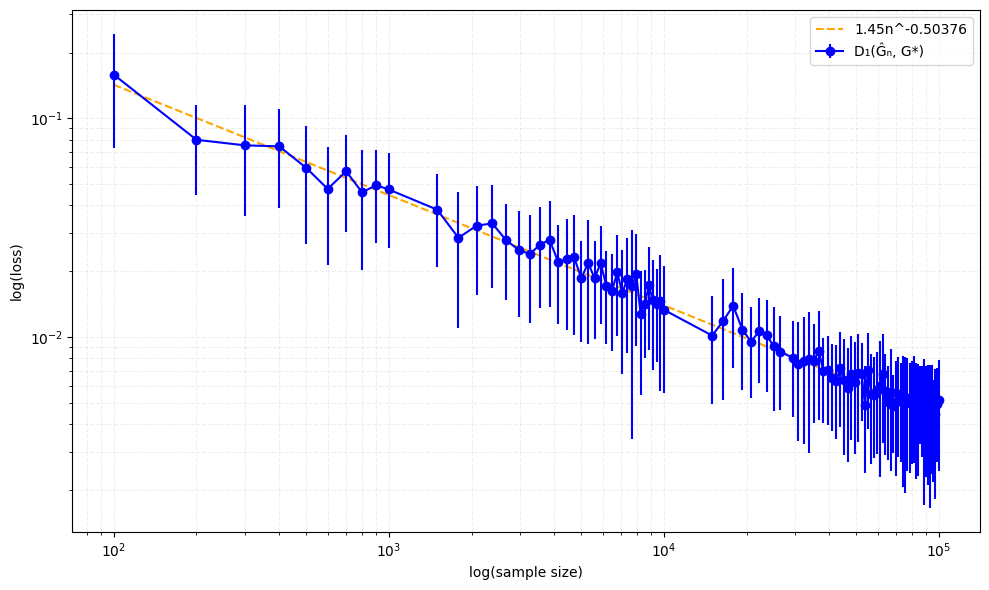

In [ ]:
result_path = "/home/fpt/moeut_training_code/numerical_experiments/results/results_sigmoid.npy"
result = np.load(result_path)
result_remove_outlier = np.concatenate([result[:, :49], result[:, 50:]], axis=1)

# plot the result by plot_voronoi_style_error
plot_voronoi_style_error(result_remove_outlier[0], result_remove_outlier[1], result_remove_outlier[2], 
                         filename=os.path.basename(result_path).replace(".npy", ".pdf"), 
                         title='Voronoi-Style Error vs. Sample Size')